# Similarity Check  with different embeddings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/Colab Notebooks/document_similarity_check/'

Mounted at /content/drive


In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks/document_similarity_check'

In [ ]:
!pip install sentence-transformers pinecone-client -q
!pip install chromadb -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.4/179.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.1/448.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 53.8 MB/s eta 

In [ ]:
import requests
import os
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
folder_path = './data/docs'
folders = os.listdir(folder_path)
folders

['invoice', 'passport', 'receipt']

In [ ]:
rows = []
for c in folders:
  docs = os.listdir(f"{folder_path}/{c}")
  for d in docs:
    with open(f"{folder_path}/{c}/{d}", "r") as file:
      rows.append([file.read(), c])

In [ ]:
df = pd.DataFrame(rows, columns=["doc_text", "doc_type"])

In [ ]:
df

,doc_text,doc_type
0,BuzyBee Management Services (002255953-A)\nMob...,invoice
1,coway\n\nCoway (Malaysia) Sdn. Bhd. (735a20-1)...,invoice
2,WILHIN MOTOR (M) SDN. BHD. eisssH\n\nNO. 4 & 5...,invoice
3,Experience of True Efficiency\n\n \n\nBILL TO\...,invoice
4,Hawaii Company Name\n\n \n\nINVOICE\n\n \n\n \...,invoice
...,...,...
294,Dion Realties Sdn Bhd (Ca. No:20154-T)\n(6ST R...,receipt
295,"A?_cil@s{ ""\n\nJIMART@SP3\nOGN GROUP SDN BHD\n...",receipt
296,\n\n \n\nKESTAURANT JIAWE |\nJIAWE| HOUSE\n\n...,receipt
297,\n\n \n\nONE ONE THREE SEAFOOD RESTAURANT SDN...,receipt


In [ ]:
df['doc_type'].value_counts()

invoice     101
receipt     100
passport     98
Name: doc_type, dtype: int64

In [ ]:
#removing stopwords from the text

#download stopwords data
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')


#load the set of stopwords

stop_words = set(stopwords.words('english'))
prt = nltk.stem.PorterStemmer()
def remove_stopwords(text):
    words = word_tokenize(text)
    tokens_pun_lower = [i.lower() for i in words if i.isalnum()]
    tokens_stop = [i for i in tokens_pun_lower if i not in stop_words]

    terms = [prt.stem(i) for i in tokens_stop]

    return " ".join(terms)

#Adding the processed text to the dataframe
df['processed_text'] = df['doc_text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df

,doc_text,doc_type,processed_text
0,BuzyBee Management Services (002255953-A)\nMob...,invoice,buzybe manag servic mobil email info websit da...
1,coway\n\nCoway (Malaysia) Sdn. Bhd. (735a20-1)...,invoice,coway coway malaysia sdn bhd ail931694 level 2...
2,WILHIN MOTOR (M) SDN. BHD. eisssH\n\nNO. 4 & 5...,invoice,wilhin motor sdn bhd eisssh 4 5 pekan bt 11 ja...
3,Experience of True Efficiency\n\n \n\nBILL TO\...,invoice,experi true effici bill invok solut sdn bhd ja...
4,Hawaii Company Name\n\n \n\nINVOICE\n\n \n\n \...,invoice,hawaii compani name invoic slogan line 1 offic...
...,...,...,...
294,Dion Realties Sdn Bhd (Ca. No:20154-T)\n(6ST R...,receipt,dion realti sdn bhd ca 6st registr ho 00065024...
295,"A?_cil@s{ ""\n\nJIMART@SP3\nOGN GROUP SDN BHD\n...",receipt,jimart sp3 ogn group sdn bhd roc jalan dinar g...
296,\n\n \n\nKESTAURANT JIAWE |\nJIAWE| HOUSE\n\n...,receipt,kestaur jiaw hous 13 jln tasik utama 8 medan n...
297,\n\n \n\nONE ONE THREE SEAFOOD RESTAURANT SDN...,receipt,one one three seafood restaur sdn bhd aman sri...


<Axes: >

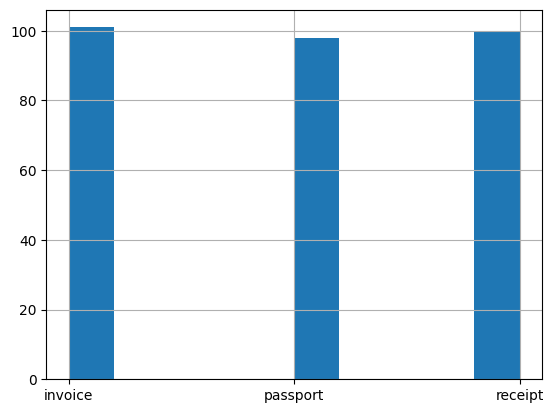

In [ ]:
df.doc_type.hist()

In [ ]:
df = df.drop(['doc_text'], axis=1)
df = df.rename(columns={'processed_text': 'doc_text'})
df

,doc_type,doc_text
0,invoice,buzybe manag servic mobil email info websit da...
1,invoice,coway coway malaysia sdn bhd ail931694 level 2...
2,invoice,wilhin motor sdn bhd eisssh 4 5 pekan bt 11 ja...
3,invoice,experi true effici bill invok solut sdn bhd ja...
4,invoice,hawaii compani name invoic slogan line 1 offic...
...,...,...
294,receipt,dion realti sdn bhd ca 6st registr ho 00065024...
295,receipt,jimart sp3 ogn group sdn bhd roc jalan dinar g...
296,receipt,kestaur jiaw hous 13 jln tasik utama 8 medan n...
297,receipt,one one three seafood restaur sdn bhd aman sri...


In [ ]:
# saving the processed dfat this check-point
# df.to_csv('./processed_txt.csv')

# df =pd.read_csv('./processed_txt.csv')

In [ ]:
train_df, valid_df = train_test_split(df, random_state=42, train_size=0.8, stratify=df.doc_type.values)
train_df.shape, valid_df.shape

((239, 2), (60, 2))

In [ ]:
# train_df
# valid_df

In [ ]:
len(df), len(train_df), len(valid_df)

(299, 239, 60)

In [ ]:
train_df[train_df['doc_type']=="invoice"].head()

,doc_type,doc_text
80,invoice,harbor technolog
95,invoice,invoic adob system softwar memo invoic ireland...
81,invoice,g b 8 tnedto oo gnebi mevai ey sempaen g5 b 12...
18,invoice,stee bear ltd bill steel bear product 2200 kat...
48,invoice,compani name applesourc softwar 1999 woodsid m...


In [ ]:
from sentence_transformers import SentenceTransformer
# model = SentenceTransformer('all-mpnet-base-v2',device='cuda')
embedd_model_name='all-mpnet-base-v2'
# embedd_model_name='multi-qa-mpnet-base-dot-v1'
# embedd_model_name='all-distilroberta-v1'
# embedd_model_name='all-MiniLM-L12-v2'
model = SentenceTransformer(embedd_model_name,device='cpu')

In [ ]:
embeding = model.encode("This is sentence")
len(embeding)

768

# using chromadb

In [ ]:
# %mkdir ./db

In [ ]:
!ls

data  processed_txt.csv     similarity_search_withdiff_embeds_Vector_Database_Pinecone_.ipynb  test
db    processed_txt.gsheet  similarity_search_with_Vector_Database_Pinecone_.ipynb


In [ ]:
documents=[]
embeddings = []
metadatas=[]
ids=[]
for i,row in train_df.iterrows():
  documents.append(row['doc_text'])
  embedding = model.encode(row['doc_text']).tolist()
  embeddings.append(embedding)
  metadatas.append({'doc_type': row['doc_type']})
  ids.append(str(i))

In [ ]:
import chromadb
from chromadb.config import Settings
client = chromadb.PersistentClient(path="./db")

In [ ]:
# collection = client.create_collection(name="documents")

# collection.add(
#     documents = documents,
#     embeddings=embeddings,
#     metadatas = metadatas,
#     ids = ids
# )

[Collection(name=documents)]

In [ ]:
# client.list_collections()

In [ ]:
collection= client.get_collection(name="documents")

In [ ]:
collection.count()

In [ ]:
query = "passport, expiry date"
input_em = model.encode(query).tolist()

results = collection.query(
    query_embeddings=[input_em],
    n_results=1
)

results

{'ids': [['178']],
 'distances': [[0.9222567081451416]],
 'metadatas': [[{'doc_type': 'passport'}]],
 'embeddings': None,
 'documents': [['passporto canada jpasseport otpamys issumgcoumvyh aysememem passport de passeport il 0 p123456aa praniit wy p19 7 2 r b given sarah k e de naissanc 01 1990 flpce ofbirhlleu de nassanc ottawa te de délivranc 2023 bate expir 14 2033 5 authoritylautorité gatineau 7 ppcanm rtinz sarah p1234 6aa n9 008d10f3301144 06']]}

In [ ]:
# results["metadatas"][0][0]['doc_type']-

'invoice'

In [ ]:
# [data['doc_type'] for  data in results["metadatas"][0]]

['receipt', 'invoice', 'passport']

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


def evaluate_predictions(predictions, actual_labels ):
  labels = list(set(actual_labels))

  cm = confusion_matrix(actual_labels, predictions, labels=labels)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=labels)
  disp.plot()
  plt.title(f'Embedd model : {embedd_model_name}')
  plt.show()
  print(classification_report(actual_labels, predictions))

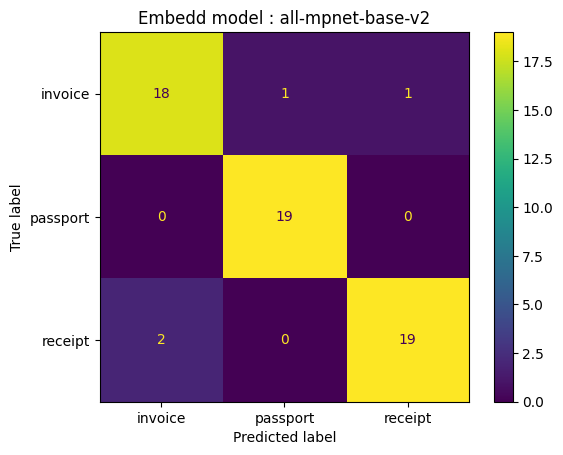

              precision    recall  f1-score   support

     invoice       0.90      0.90      0.90        20
    passport       0.95      1.00      0.97        19
     receipt       0.95      0.90      0.93        21

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



In [ ]:
predictions = []
actual_labels = []
for i,row in valid_df.iterrows():
  ocr_text= row['doc_text']
  actual_labels.append(row['doc_type'])

  results = collection.query(query_embeddings=[model.encode(ocr_text).tolist()], n_results=1)
  predictions.append( results["metadatas"][0][0]['doc_type'])

  # doc_types = [data['doc_type'] for  data in results["metadatas"][0]]
  # max_occurrence_doc_type = max(doc_types, key=doc_types.count)
  # predictions.append(max_occurrence_doc_type)
  # # print((row['doc_type'], max_occurrence_doc_type))

evaluate_predictions(actual_labels, predictions)

In [ ]:
# after deldeting
collection.count()

238

In [ ]:
# to view all datas
# collection.get()

In [ ]:
client.list_collections()

[Collection(name=documents)]

In [ ]:
## delete a collection with it's name

# client.delete_collection(name="documents")

In [ ]:
## delete entire database

# client.reset()
# client.list_collections()